## Euclidean and Manhattan Distance Calculations

Examples and comparisons of distance measures.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [29]:
# Load Course Numerical Dataset
df = pd.read_csv('distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [30]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

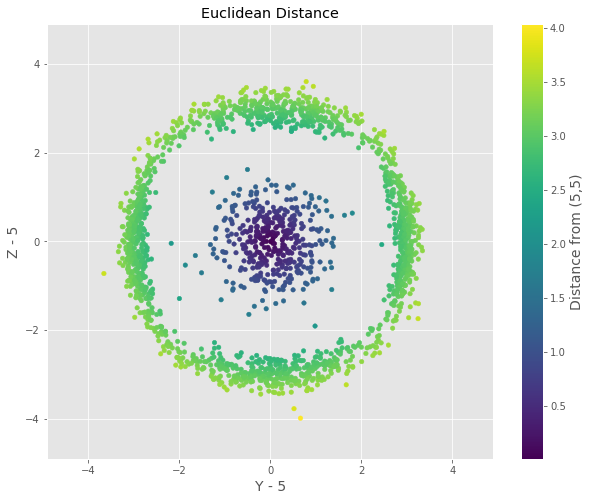

In [31]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

figEuclid.savefig('Euclidean.png')

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [32]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

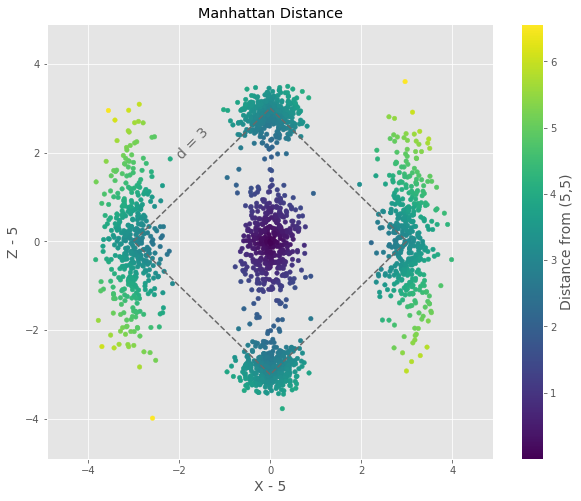

In [33]:
figManhattan = plt.figure(figsize=[10,8])

plt.scatter(df.X - 5, df.Z-5, c=distManhattan, s=20)
#plt.plot([0,3,0,-3,0], [3,0,-3,0,3], '--', color='#33FF99')
plt.plot([0,3,0,-3,0], [3,0,-3,0,3], '--', color='dimgray')
plt.text(-2.1, 1.85, 'd = 3', rotation=45, size=14, color='dimgray')
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('X - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Manhattan Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

figManhattan.savefig('manhattan.png')

Now let's create distributions of these distance metrics and compare them.

In [34]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].as_matrix()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

/Users/aidenjohnson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


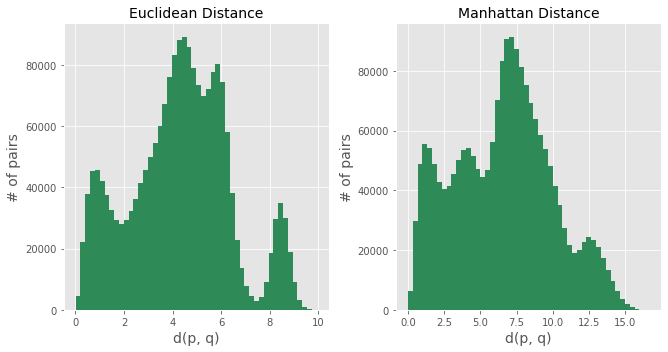

In [35]:
figDistComp = plt.figure(figsize=(14,5))

ax1 = figDistComp.add_subplot('131')
n, bins, patches = ax1.hist(DistEuclid, 50, facecolor='seagreen')
plt.xlabel('d(p, q)', size=14)
plt.ylabel('# of pairs', size=14)
plt.title('Euclidean Distance', size=14)

ax2 = figDistComp.add_subplot('132')
n, bins, patches = ax2.hist(DistManhattan, 50, facecolor='seagreen')
plt.xlabel('d(p, q)', size=14)
plt.ylabel('# of pairs', size=14)
plt.title('Manhattan Distance', size=14)

plt.tight_layout()

figDistComp.savefig('distance-comparison.png')